# Image Transformations
Throughout `maspim` we  make use of numerous transformations. In image registration (matching one image to another) a transformation $T$ takes a source image $s$ and maps it to a target image $t$: $T(s) \rightarrow t$. 

## Matching scales
Oftentimes $t$ and $s$ have different shapes. For example, our target could be a photo from an MSI and the source from a µXRF measurement. In general, their resolutions and aspect ratios will be different. This can be addressed in a rescaling step, the source is first stretched to the same aspect ratio and then resized to match the resolution of the target. So from now on we will assume that the source and target have the same shapes.

The `Transformation` is the main workhorse of any transformation in `maspim` and does the rescaling during its initialization

In [2]:
import os

from maspim import Transformation, ImageROI, plt_cv2_image
import user_params

target = ImageROI.from_disk(path_folder=user_params.checkpoint('full example', None))
source = ImageROI.from_disk(path_folder=user_params.checkpoint('S0343c XRF', None))

transformer = Transformation(source=source, target=target)

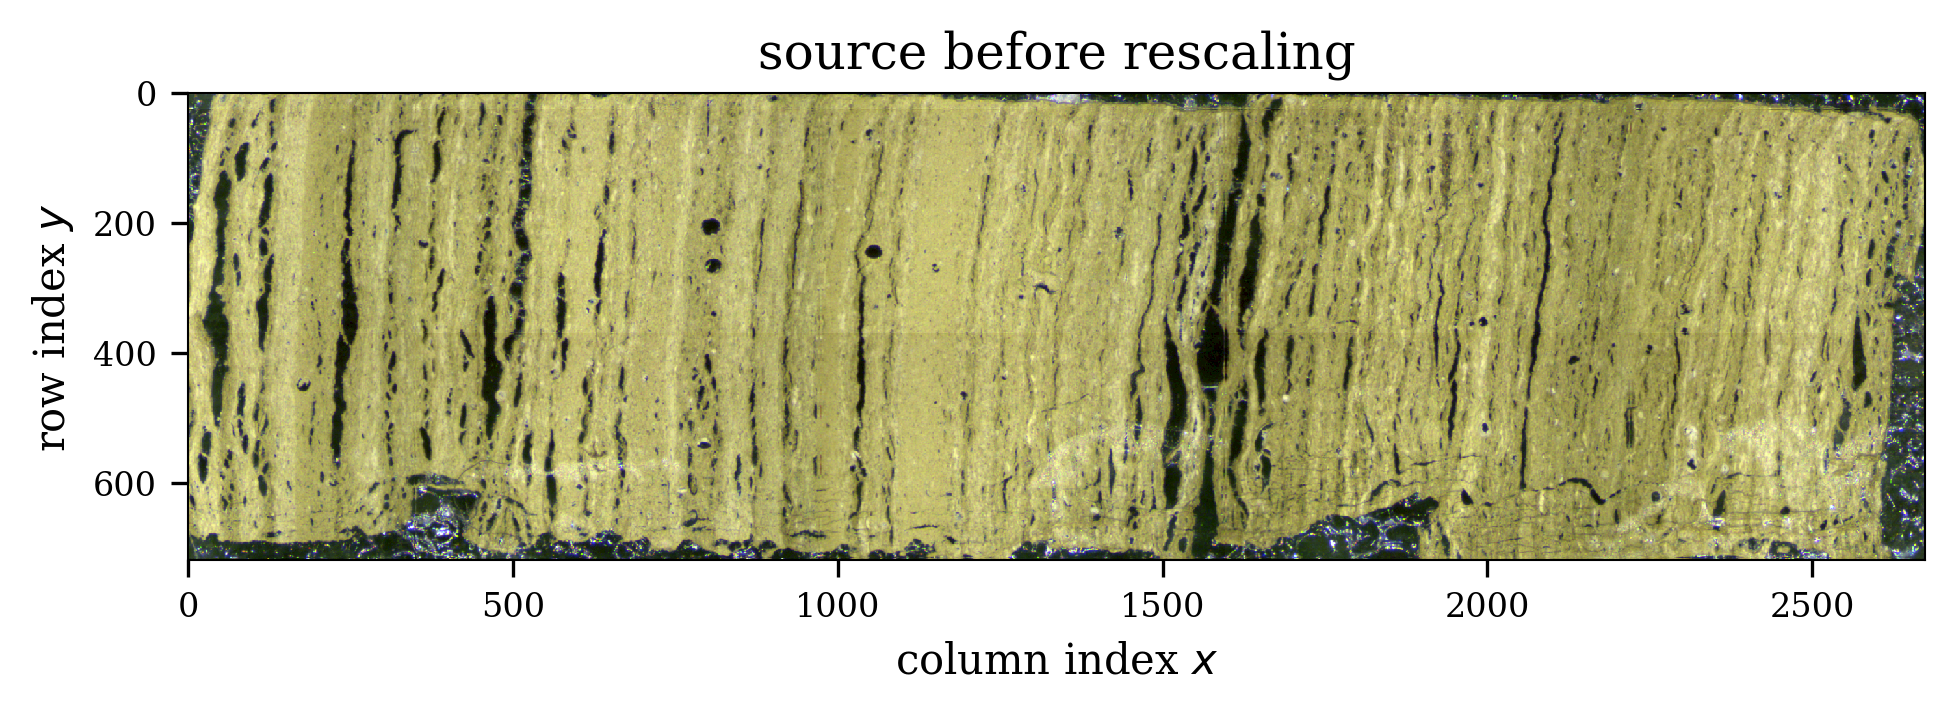

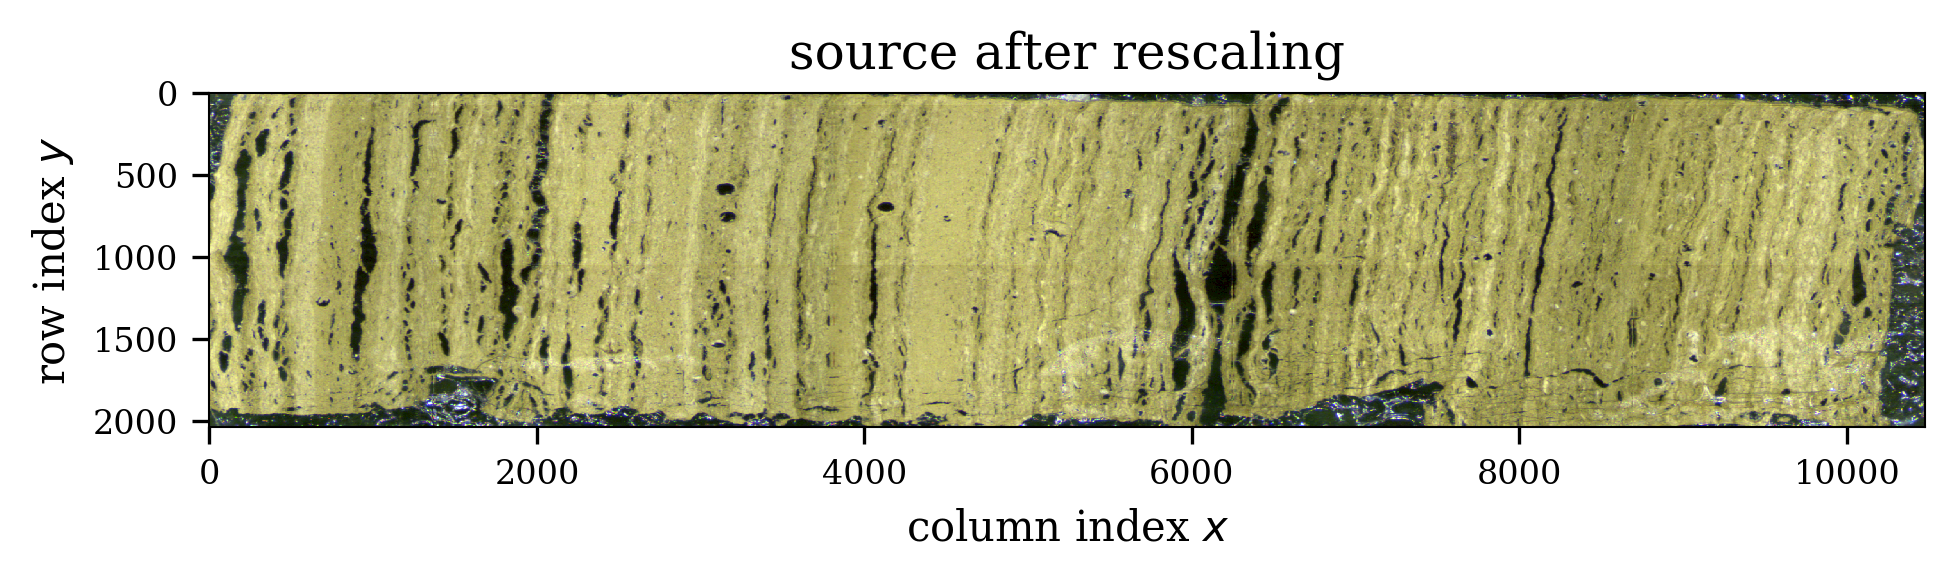

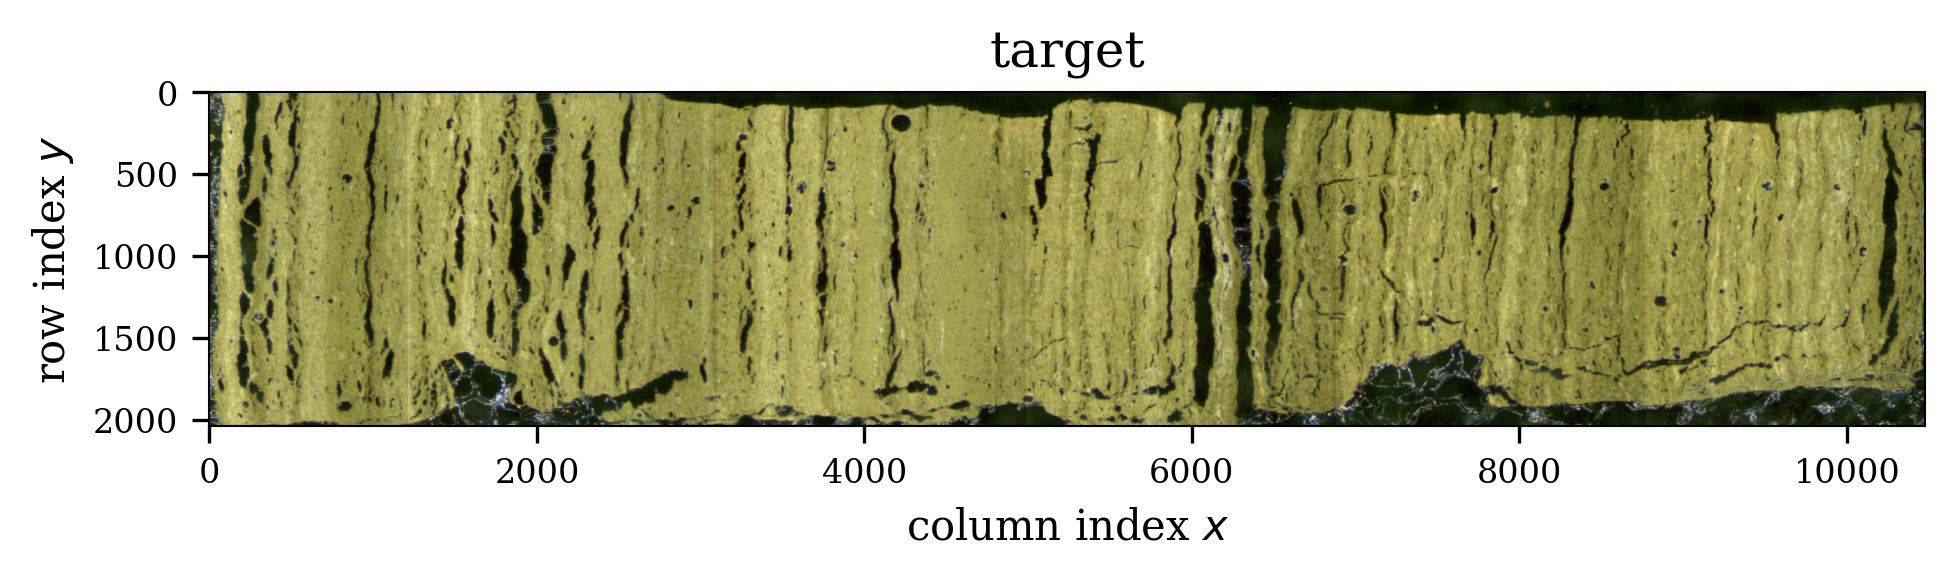

In [3]:
%matplotlib inline
plt_cv2_image(source.image, title='source before rescaling')
plt_cv2_image(transformer.source.image, title='source after rescaling')
plt_cv2_image(transformer.target.image, title='target')

## Matching bounding boxes
In chapter 5 a `Transformation` is used to map the µXRF onto the MSI data. For a rough match, the contours of samples are encompassed in a rectangle (possibly rotated) and a [perspective transformation](https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html) is used to map the corners of the rectangles. 

## Introducing the `Mapper` class
Transformations defined by only a few matched points can be described by small matrices ($2\times 2$ or $3\times 3$) that, when multiplied with a set of coordinates transform them into the coordinates in the target image. For more complex, non-uniform transformations this is not possible (e.g. [optical flow](https://scikit-image.org/docs/stable/auto_examples/registration/plot_opticalflow.html)). Instead, the transformation is described by a set of deformation vectors: for each pixel in the image, there is a vector that translates the pixel in the source to that in the target image. One can therefore describe the transformation by the horizontal shift vectors $u$ and vertical shifts $v$. 

This can also be applied to uniform transformations (although this is overkill). Doing this also allows concatenating any transformations that keep the image's shape the same. This is what the `Mapper` class is for. It allows saving any combination of transformations by keeping track of the deformation vectors. This makes it convenient to combine transformations of e.g. `scikit-image` and `openCV` which otherwise would require keeping track of the entire scope (input images, parameters, ...). 

## Other transformations
We will not discuss other transformations in detail as they either go back to the first principle (defining a small set of matching points) or the second principle (defining a translation vector for every pixel). Briefly, other transformations available in `maspim` are
* affine transformation between punch holes (rigid)
* piece-wise affine transformation between punch holes and bounding box corners (non-rigid)
* rotation for rotated bounding boxes (rigid)
* tilt correction (non-rigid)
* optical flow (non-rigid)
* laminae matching (non-rigid)
